# Задания

## Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans

from sklearn import metrics 
from pandas import DataFrame
#убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
#Загрузи информацию о заявках на кредит. Перечисли кому должны выдать кредит
df = pd.read_csv('../datasets/credit_scoring.csv')
#df.info()
#df.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Имя             6 non-null      object
 1   Возраст         6 non-null      int64 
 2   Месячный доход  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


,Имя,Возраст,Месячный доход
0,Николай,39,5600
1,Ольга,43,12000
2,Митя,17,15000
3,Вика,19,9600
4,Петр,21,20000
5,Кирилл,13,500


In [3]:
df = df[(df['Возраст'] >= 18) & (df['Месячный доход'] > 10000)]
print (df)


     Имя  Возраст  Месячный доход
1  Ольга       43           12000
4   Петр       21           20000


<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

Клиенты, которым должны одобрить заявку на кредит: Ольга, Петр

##  работа с Iris dataset

In [5]:
iris = datasets.load_iris()
# Смотрим на названия переменных
#print (iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
#print (iris.data[:10])
# Смотрим на целевую переменную:
print ('Целевая переменная=', iris.target_names)
#print (iris.target)


Целевая переменная= ['setosa' 'versicolor' 'virginica']


In [6]:
import matplotlib.pyplot as plt
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
#iris_frame


In [7]:
#Столбец с именами
name = []
name = iris_frame.target.apply(lambda x : iris.target_names[x])

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

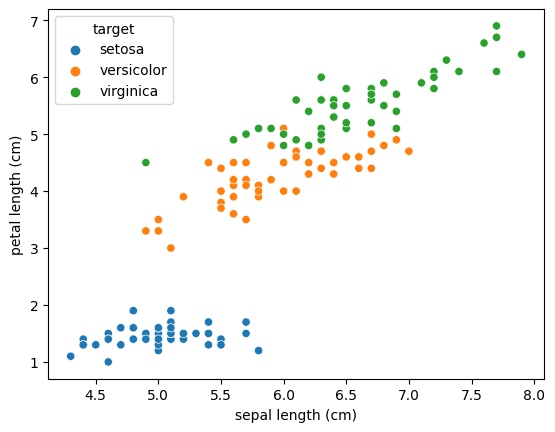

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=iris_frame, x='sepal length (cm)', y='petal length (cm)', hue = name)


задача классификации подвидов ирисов с помощью деревьев решений.
датасет разделен на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучено дерево решений с глубиной дерева 2.
Посчитана точность (accuracy) классификации

In [9]:
X_iris = iris_frame.drop('target', axis=1)
X_iris = X_iris.drop('sepal width (cm)', axis=1)
X_iris = X_iris.drop('petal width (cm)', axis=1)
y_iris = iris_frame['target']
#print('x, y shape = ', X_iris.shape, y_iris.shape)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
treemodel = DecisionTreeClassifier(max_depth=2)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [10]:
ypred = treemodel.predict(X_test)
score = accuracy_score(ypred, y_test)
print('accuracy', score.round(3))
#print(classification_report(ypred, y_test))

accuracy 0.967


Построена [разделяющая поверхность] по признакам "Длина чашелистика" и "Длина лепестка". 
дерево, которое получилось в результате обучения модели. 


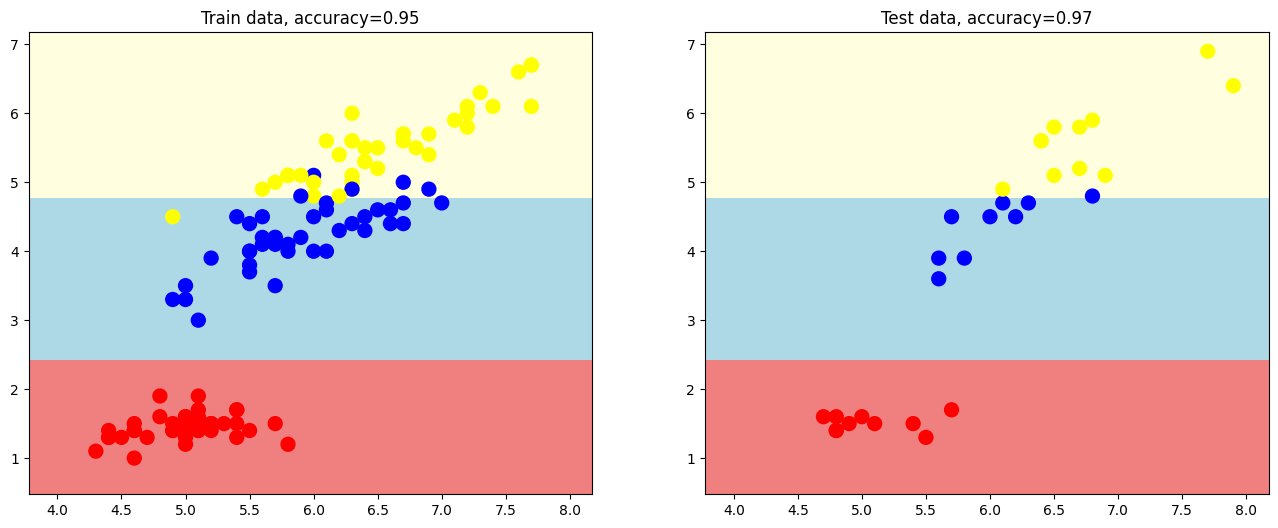

In [11]:
import sys
# Добавление пути к родительской папке в список путей поиска модулей
sys.path.append('../code-samples')
# Импорт файла из другой папки
from surface import get_meshgrid, plot_decision_surface
meshgrid = get_meshgrid(X_iris.values)
# Построение разделяющей поверхности и дерева решений
plot_decision_surface(treemodel, X_train, y_train, X_test, y_test)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

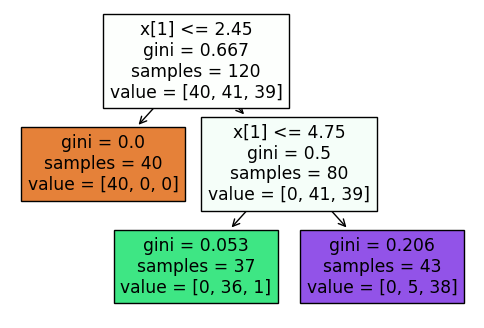

In [13]:
plt.figure(figsize=(6, 4))
tree.plot_tree(treemodel, filled=True)

У получившегося дерева 3 листa

задача регресси с спомощью синусоидального сигнала

In [14]:
sys.path.append('../code-samples')
# Импорт файла из другой папки
from dataset import generate_sin
X, y = generate_sin(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

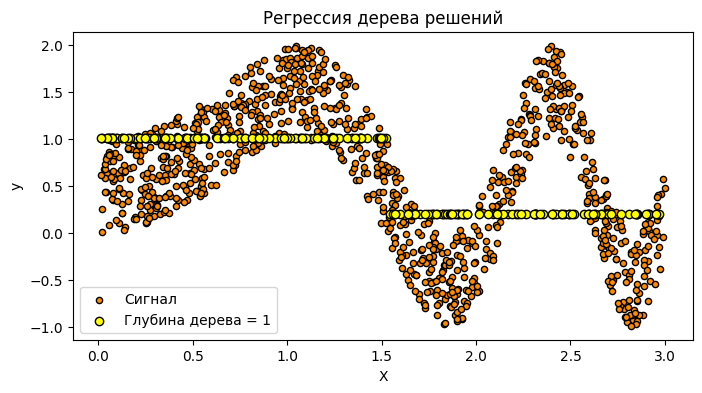

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1, random_state=42)
regr_1.fit(X_train, y_train)
# Predict
y_1 = regr_1.predict(X_test)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Сигнал")
plt.scatter(X_test, y_1, edgecolor="black", c="yellow", label="Глубина дерева = 1")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Регрессия дерева решений")
plt.legend()
plt.show()

[Text(0.5, 0.75, 'x[0] <= 1.533\nsquared_error = 0.544\nsamples = 800\nvalue = 0.615'),
 Text(0.25, 0.25, 'squared_error = 0.209\nsamples = 408\nvalue = 1.01'),
 Text(0.75, 0.25, 'squared_error = 0.563\nsamples = 392\nvalue = 0.204')]

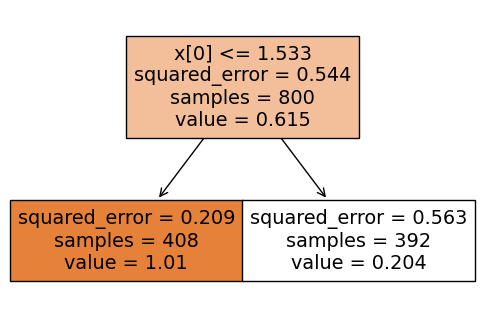

In [17]:
plt.figure(figsize=(6, 4))
tree.plot_tree(regr_1, filled=True)

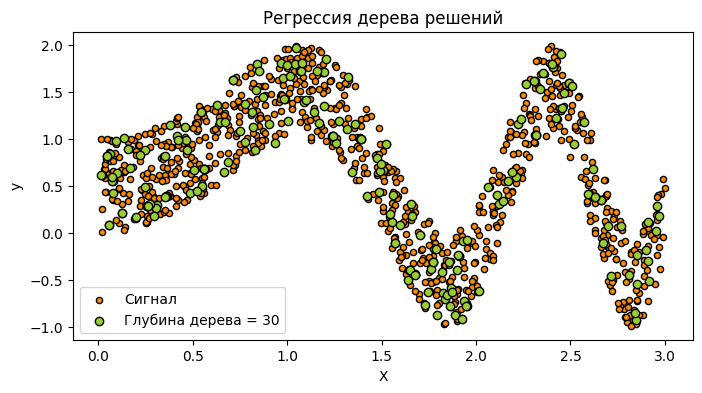

In [18]:
regr_2 = DecisionTreeRegressor(max_depth=30, random_state=42)
regr_2.fit(X_train, y_train)
# Predict
y_2 = regr_2.predict(X_test)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Сигнал")
#plt.scatter(X_test, y_1, edgecolor="black", c="yellow", label="Глубина дерева = 1")
plt.scatter(X_test, y_2, edgecolor="black", c="yellowgreen", label="Глубина дерева = 30")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Регрессия дерева решений")
plt.legend()
plt.show()
#plt.figure(figsize=(8, 4))
#tree.plot_tree(regr_2, filled=True)


Минимальное MSE 5


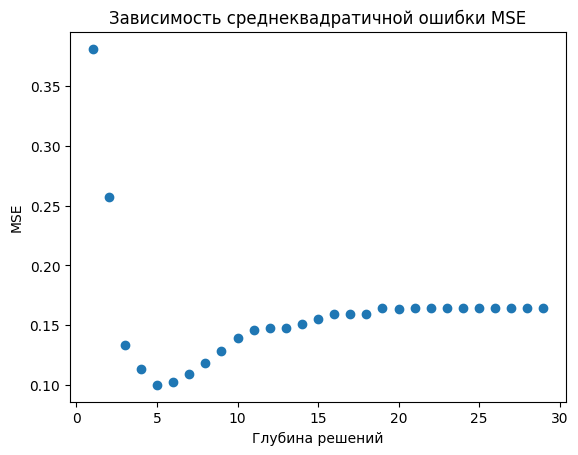

In [22]:
from sklearn.metrics import mean_squared_error
depth=range(1,30)
mse_score=[]

for i in depth:
# создание обучающей модели регрессии
    cif= DecisionTreeRegressor(max_depth=i)
    cif.fit(X_train, y_train)

    y_pred=cif.predict(X_test)
# MSE
    mse=mean_squared_error(y_test, y_pred)
    mse_score.append(mse)

# построение графика
plt.scatter(depth, mse_score)
plt.title('Зависимость среднеквадратичной ошибки MSE')
plt.xlabel('Глубина решений')
plt.ylabel('MSE')
print('Минимальное MSE', mse_score.index(min(mse_score)) + 1)

Глубина дерева, на котором MSE на тестовой выборке наилучший: _5_

метод bootstrap. `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. 
среднеквадратичная ошибка (MSE) предсказания на тестовой выборке.  график зависимости MSE 
от **количества базовых моделей** 

Наилучшее качество модели при количестве деревьев 47


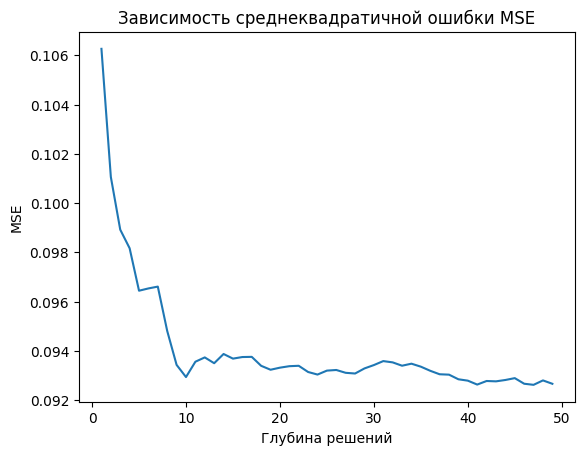

In [23]:
# Bagging decision tree regressor
from sklearn.ensemble import BaggingRegressor

#bdt = BaggingRegressor(DecisionTreeRegressor(max_depth=5), bootstrap=True, random_state=42).fit(X_train, y_train)
#bdt_predict = bdt.predict(X_test)

import warnings
warnings.filterwarnings('ignore')


depth=range(1,50)
mse_score=[]

for i in depth:
# создание обучающей модели регрессии
    bdt = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=i, bootstrap=True, random_state=42)
    bdt.fit(X_train, y_train)
    bdt_pred = bdt.predict(X_test)
# MSE
    mse=mean_squared_error(y_test, bdt_pred)
    mse_score.append(mse)

# построение графика
plt.plot(depth, mse_score)
plt.title('Зависимость среднеквадратичной ошибки MSE')
plt.xlabel('Глубина решений')
plt.ylabel('MSE')


print('Наилучшее качество модели при количестве деревьев', mse_score.index(min(mse_score)) + 1)

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47

алгоритм случайного леса (Random Forest). 

In [24]:
from dataset import generate_sin
X, y = generate_sin(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# Random Forest
rf = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

mse=mean_squared_error(y_test, rf_predict)
print(mse.round(3))


0.091
